In [1]:
!pip install ipyplot git+https://github.com/neuml/txtai#egg=txtai[pipeline] transformers==4.21.3

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Cloning https://github.com/neuml/txtai to /tmp/pip-install-6q9mvm2r/txtai_0a0af1523d624be3b2147ab763f478be
  Running command git clone --filter=blob:none --quiet https://github.com/neuml/txtai /tmp/pip-install-6q9mvm2r/txtai_0a0af1523d624be3b2147ab763f478be
  Resolved https://github.com/neuml/txtai to commit 33bc4261be20979a13514f81afdfbf077203c959
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of ipyplot to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of transformers to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 56.2 MB/s eta 0:00:00 MB/s eta 0:00:01:01
INFO: pip is looking at multiple versions of <P

In [2]:
# download this dataset
# https://www.kaggle.com/datasets/prasunroy/natural-images

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "" # disable gpu

In [4]:
from PIL import Image

In [5]:
MAX_DOCS = 10000
DATA_DIR = 'natural_images'
DATA_PATH = f"{DATA_DIR}/**/*.jpg"
QUERY_IMAGE = "./natural_images/airplane/airplane_0000.jpg"

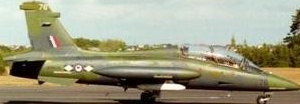

In [6]:
Image.open(QUERY_IMAGE)

## Generate Caption

In [7]:
%%capture

from txtai.pipeline import Caption

# Create caption pipeline
caption = Caption()

In [8]:
text = caption([QUERY_IMAGE])
text

['a fighter jet sitting on top of a runway']

/home/a/miniconda3/envs/xox/lib/python3.8/site-packages/ipyplot/_utils.py:95: FutureWarning: The input object of type 'JpegImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'JpegImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.asarray(seq, dtype=type(seq[0]))



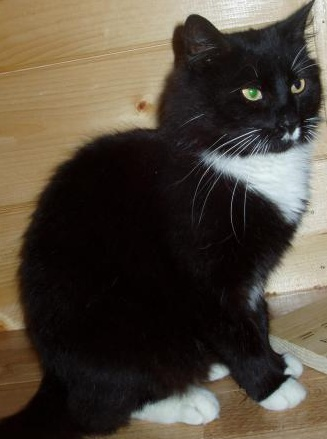
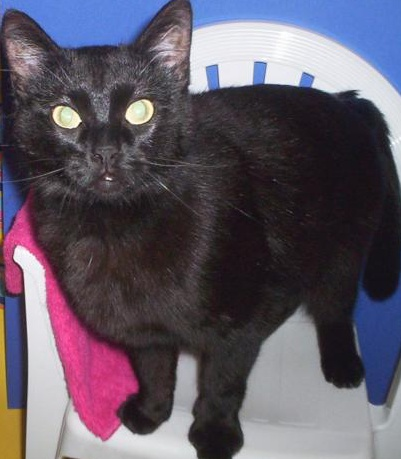
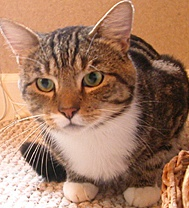
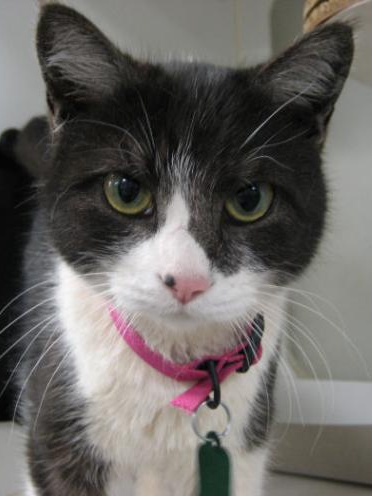
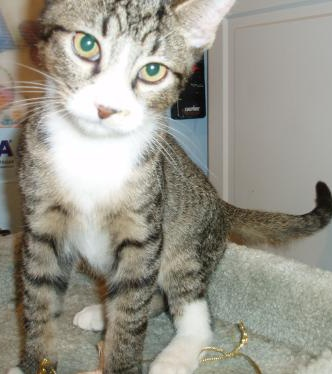
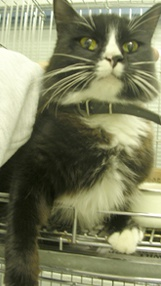
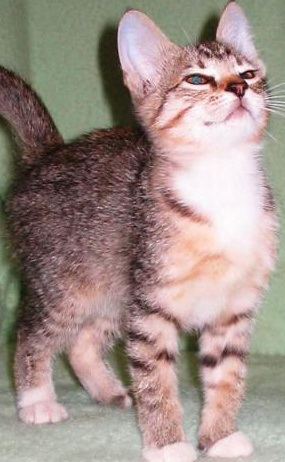
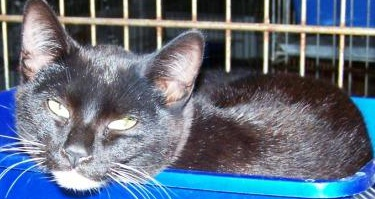
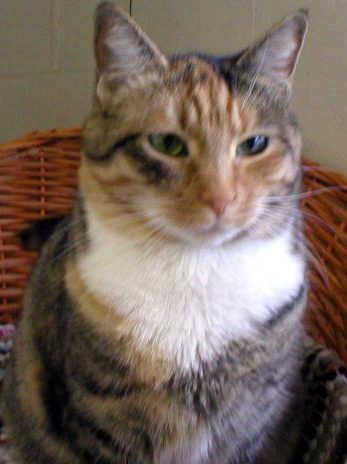
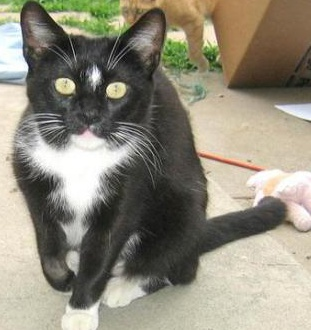


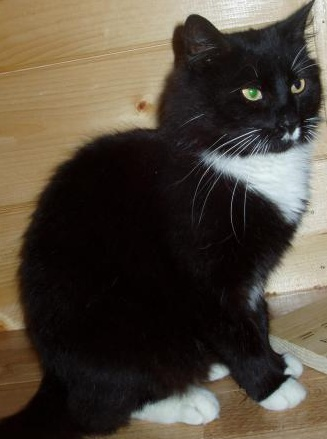
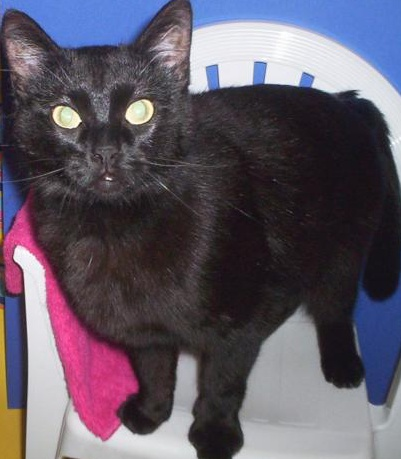
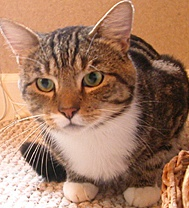
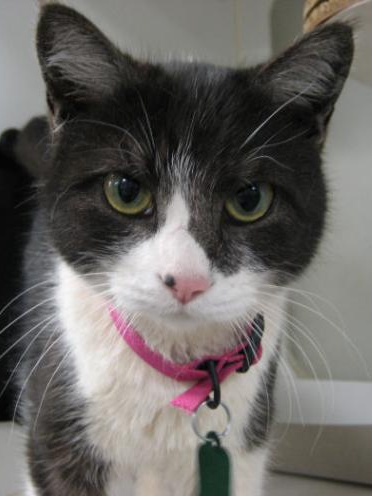
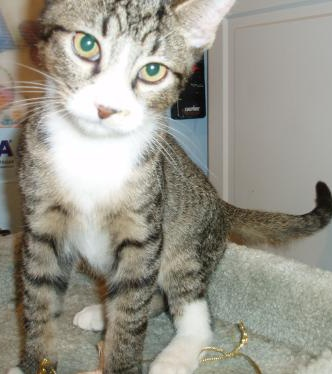
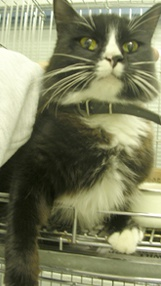
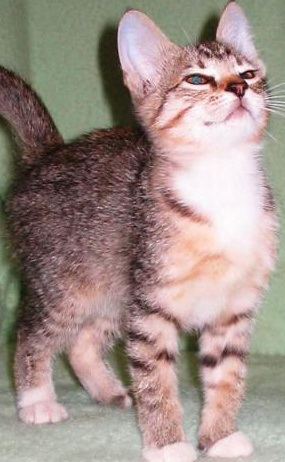
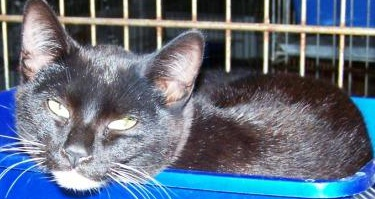
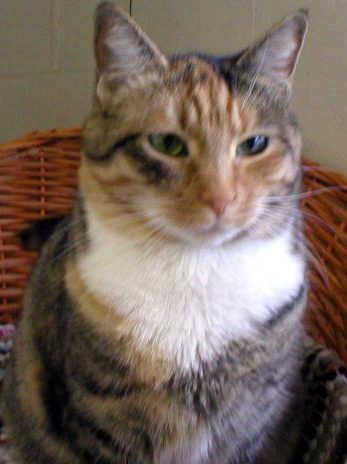
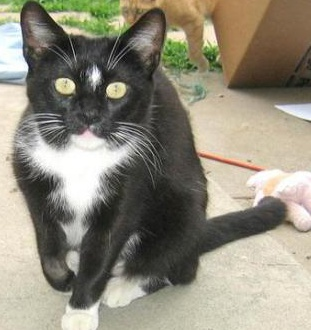

In [9]:
import glob
import ipyplot
# Get list of images
images = glob.glob(DATA_PATH)[:10]

# Generate captions
captions = caption(images)

# Show image/caption pairs
ipyplot.plot_images([Image.open(image) for image in images], captions, img_width=224, force_b64=True)

# Detect object in image

In [10]:
%%capture

from txtai.pipeline import Objects

# Create objects pipeline
objects = Objects()

/home/a/miniconda3/envs/xox/lib/python3.8/site-packages/ipyplot/_utils.py:95: FutureWarning: The input object of type 'JpegImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'JpegImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.asarray(seq, dtype=type(seq[0]))
/home/a/miniconda3/envs/xox/lib/python3.8/site-packages/ipyplot/_plotting.py:140: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = _np.asarray(labels)



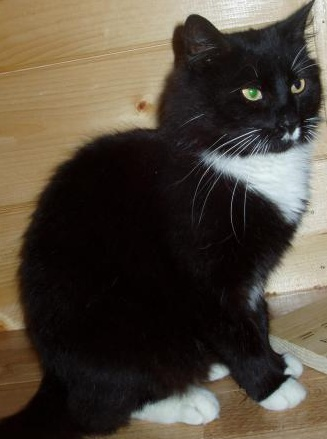
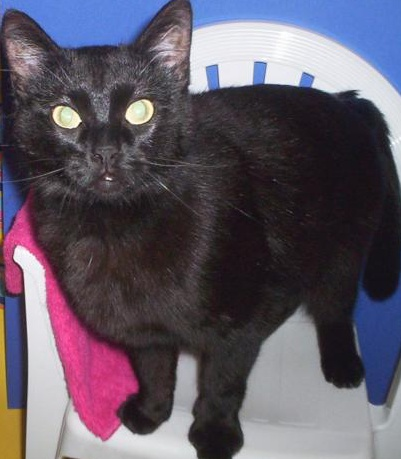
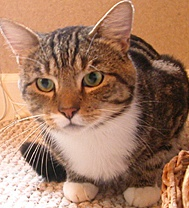
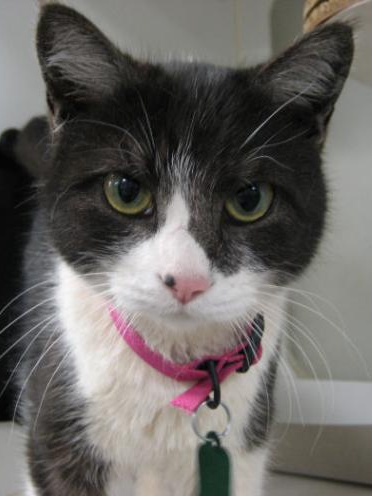
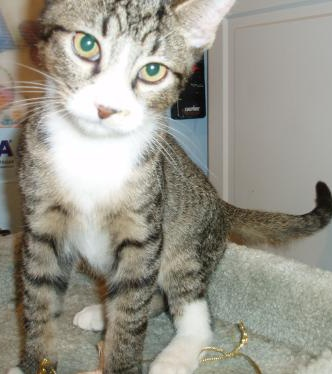
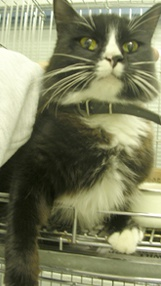
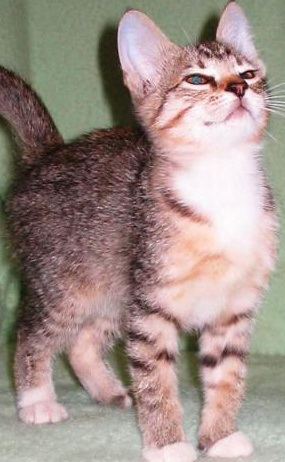
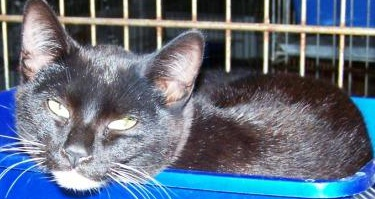
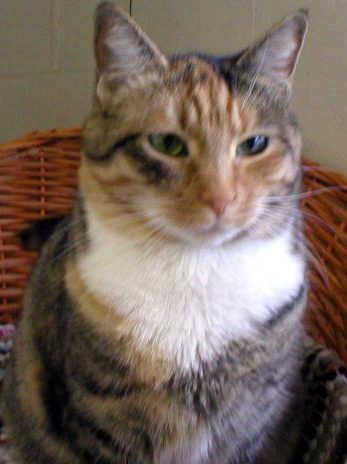
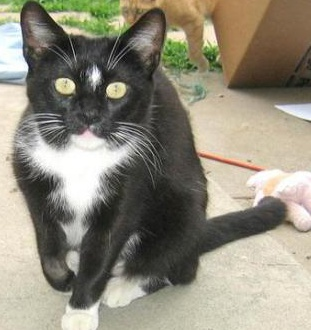


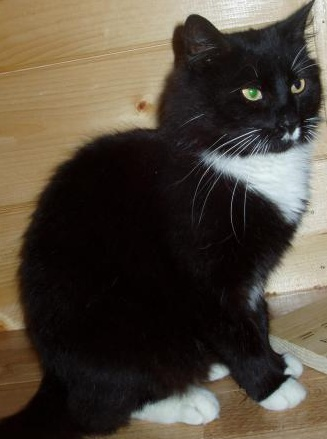
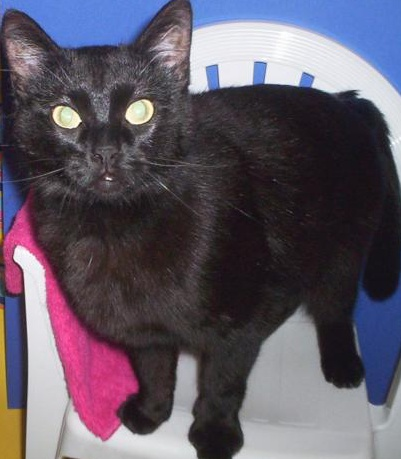
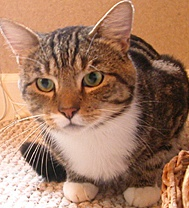
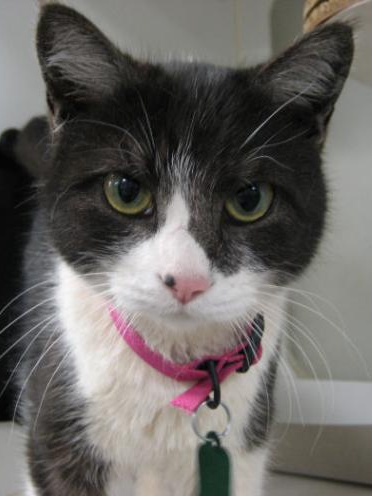
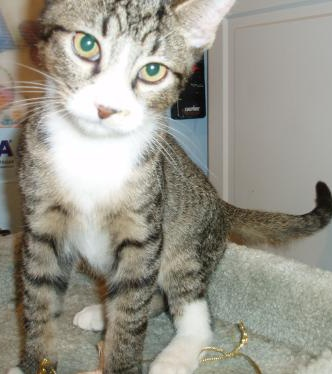
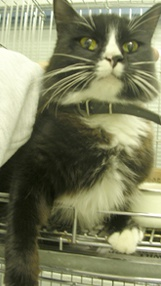
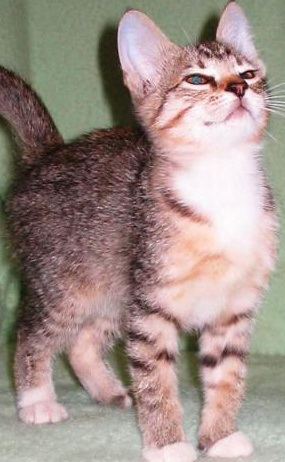
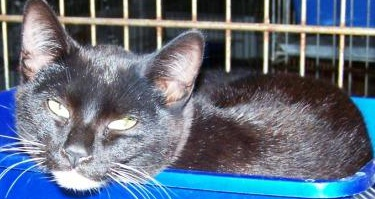
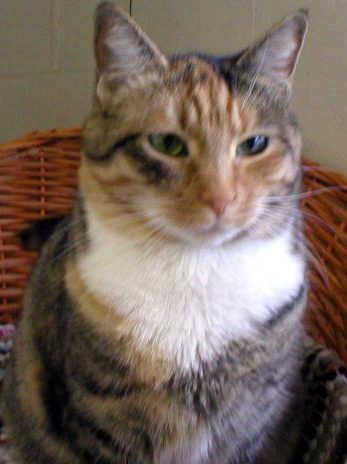
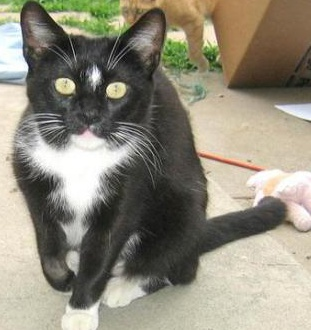

In [11]:
# Generate captions
detected = objects(images)

# Show image/caption pairs
ipyplot.plot_images([Image.open(image) for image in images], detected, img_width=224, force_b64=True)